In [2]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [3]:
# Load the IPL dataset
ipl = pd.read_csv('ipl_data.csv')

# Display the first 5 rows of the dataset
ipl.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# Dropping irrelevant columns
df = ipl.drop(['mid', 'date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker'], axis=1)

# Display the first 5 rows of the updated DataFrame
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [5]:
# Define features (X) and target variable (y)
X = df.drop(['total'], axis=1)
y = df['total']

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = batsman_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# Display the first 5 rows of the updated DataFrame
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,328,201
1,14,6,12,61,201
2,14,6,12,61,201
3,14,6,12,61,201
4,14,6,12,61,201


In [7]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (53209, 5)
X_test shape: (22805, 5)
y_train shape: (53209,)
y_test shape: (22805,)


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training and testing sets to verify
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

print(X_train_scaled)

X_train_scaled shape: (53209, 5)
X_test_scaled shape: (22805, 5)
[[0.44117647 0.92307692 0.         0.1902439  0.36890244]
 [0.64705882 0.15384615 0.30769231 0.95853659 0.14634146]
 [0.41176471 0.92307692 1.         0.93658537 0.53353659]
 ...
 [0.02941176 0.53846154 0.         0.5195122  0.55792683]
 [0.44117647 0.         0.53846154 0.62926829 0.83841463]
 [0.41176471 0.92307692 0.         0.93658537 0.5152439 ]]


In [10]:
input_dimension = X_train_scaled.shape[1]

# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=512, activation="relu", input_dim=input_dimension))
nn_model.add(tf.keras.layers.Dense(units=216, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
nn_model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression

In [21]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.6005
Epoch 2/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.4286
Epoch 3/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.1503
Epoch 4/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.1695
Epoch 5/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.2511
Epoch 6/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.1335
Epoch 7/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.1714
Epoch 8/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.0330
Epoch 9/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 16.0110
Epoch 10/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 15.8351
Epoch 11/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 15.8291
Epoch 12/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 15.8235
Epoch 13/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 15.8891
Epoch 14/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 15.9227
Epoch 15/50
166

<Axes: >

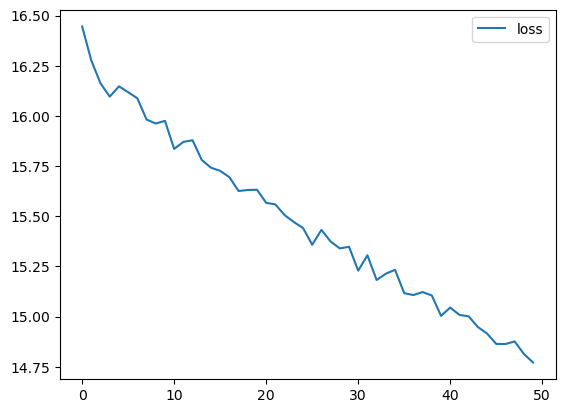

In [22]:
model_losses = pd.DataFrame(nn_model.history.history)
model_losses.plot()

In [23]:
# Make predictions
predictions = nn_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


15.310411703071686